In [1]:
import pandas as pd

In [2]:
user_artists = pd.read_csv('user_artists.dat', sep='\t')
user_artists.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [3]:
artists = pd.read_csv('artists.dat', sep='\t')
artists.head()

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
#pd.set_option('display.max_colwidth', -1)


In [5]:
# df.rename(str.lower, axis='columns')
# df.rename({1: 2, 2: 4}, axis='index')

artists = artists.rename({'id': 'artistID'}, axis='columns')
artists.head()

,artistID,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [6]:
user_and_artists = pd.merge(artists, user_artists, on='artistID')
user_and_artists.head()

,artistID,name,url,pictureURL,userID,weight
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,34,212
1,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,274,483
2,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,785,76
3,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg,135,1021
4,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg,257,152


In [7]:
user_and_artists.shape

(92834, 6)

In [8]:
len(user_and_artists['name'].value_counts())

17632

In [9]:
user_and_artists = user_and_artists.sort_values(by='userID')
user_and_artists.head()

,artistID,name,url,pictureURL,userID,weight
3903,90,Kosheen,http://www.last.fm/music/Kosheen,http://userserve-ak.last.fm/serve/252/3309551.jpg,2,1471
4096,99,INXS,http://www.last.fm/music/INXS,http://userserve-ak.last.fm/serve/252/26433237...,2,1330
4145,100,ABC,http://www.last.fm/music/ABC,http://userserve-ak.last.fm/serve/252/41596559...,2,1315
676,53,Air,http://www.last.fm/music/Air,http://userserve-ak.last.fm/serve/252/251119.jpg,2,11351
2910,77,George Michael,http://www.last.fm/music/George+Michael,http://userserve-ak.last.fm/serve/252/39849449...,2,2120


In [10]:
user_and_artists.to_csv('user_and_artists.csv', index=False)

In [11]:
df = pd.read_csv('user_and_artists.csv')
df.head()

,artistID,name,url,pictureURL,userID,weight
0,90,Kosheen,http://www.last.fm/music/Kosheen,http://userserve-ak.last.fm/serve/252/3309551.jpg,2,1471
1,99,INXS,http://www.last.fm/music/INXS,http://userserve-ak.last.fm/serve/252/26433237...,2,1330
2,100,ABC,http://www.last.fm/music/ABC,http://userserve-ak.last.fm/serve/252/41596559...,2,1315
3,53,Air,http://www.last.fm/music/Air,http://userserve-ak.last.fm/serve/252/251119.jpg,2,11351
4,77,George Michael,http://www.last.fm/music/George+Michael,http://userserve-ak.last.fm/serve/252/39849449...,2,2120


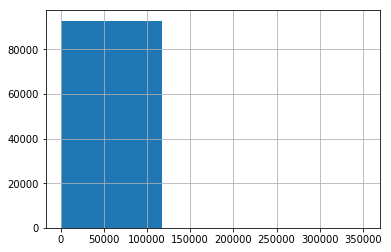

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

user_and_artists['weight'].hist(bins=3)

In [13]:
user_and_artists['weight'].describe()

count     92834.00000
mean        745.24393
std        3751.32208
min           1.00000
25%         107.00000
50%         260.00000
75%         614.00000
max      352698.00000
Name: weight, dtype: float64

In [14]:
# Here I'm inferring a rating for each artist based on how many times each user listened to them using 'weight'

ratings = []

for row in user_and_artists['weight']:
    if row <=25.0:
        ratings.append(1)
    elif row <= 50.0:
        ratings.append(2)
    elif row <= 107.0:
        ratings.append(3)
    elif row <= 175.0:
        ratings.append(4)
    elif row <= 260.0:
        ratings.append(5)
    elif row <= 400.0:
        ratings.append(6)
    elif row <= 614.0:
        ratings.append(7)
    elif row <= 1000.0:
        ratings.append(8)
    elif row <= 5000.0:
        ratings.append(9)
    else:
        ratings.append(10)
        
user_and_artists['artistRatings'] = ratings
user_and_artists.head()

,artistID,name,url,pictureURL,userID,weight,artistRatings
3903,90,Kosheen,http://www.last.fm/music/Kosheen,http://userserve-ak.last.fm/serve/252/3309551.jpg,2,1471,9
4096,99,INXS,http://www.last.fm/music/INXS,http://userserve-ak.last.fm/serve/252/26433237...,2,1330,9
4145,100,ABC,http://www.last.fm/music/ABC,http://userserve-ak.last.fm/serve/252/41596559...,2,1315,9
676,53,Air,http://www.last.fm/music/Air,http://userserve-ak.last.fm/serve/252/251119.jpg,2,11351,10
2910,77,George Michael,http://www.last.fm/music/George+Michael,http://userserve-ak.last.fm/serve/252/39849449...,2,2120,9


In [15]:
user_and_artists['artistRatings'].value_counts(normalize=True)

9     0.134746
6     0.132150
4     0.128800
5     0.121324
3     0.120915
7     0.116972
8     0.098261
1     0.074789
2     0.055335
10    0.016707
Name: artistRatings, dtype: float64

### Recommendations based on ratings counts

In [16]:
rating_count = pd.DataFrame(user_and_artists.groupby('name')['artistRatings'].count())
rating_count.sort_values('artistRatings', ascending=False).head()

,artistRatings
name,
Lady Gaga,611
Britney Spears,522
Rihanna,484
The Beatles,480
Katy Perry,473


For the last.fm dataset, the artist that received the most rating counts is Lady Gaga.  Something that binds every artist in this list, with the exception of The Beatles, is that they're all pop singers.

### Recommendations based on correlations

We use Pearson's R correlation coefficient.  First we need to find out the average rating, and the number of ratings each book received.

In [17]:
average_rating = pd.DataFrame(user_and_artists.groupby('name')['artistRatings'].mean())
average_rating.sort_values(by='artistRatings', ascending=False).head(50)

,artistRatings
name,
Betty Boo,10.0
Pig Destroyer,10.0
Au4,10.0
Shannon Noll,10.0
Parque En El Espacio,10.0
Viking Quest,10.0
Axel Fernando,10.0
EMF,10.0
Nikka Costa,10.0


In [18]:
average_rating['ratingCount'] = pd.DataFrame(user_and_artists.groupby('name')['artistRatings'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,artistRatings,ratingCount
name,,
Lady Gaga,6.862520,611
Britney Spears,7.473180,522
Rihanna,6.710744,484
The Beatles,6.587500,480
Katy Perry,6.583510,473


In this dataset, the artist that received the most rating counts was not highly rated at all.  As a result, if we were to use recommendations based on rating counts, we would definitely make mistakes here.  So we need a better system.

### Ratings Matrix

We convert the ratings table to a 2D matrix.  The matrix will be sparse because not every user rated every artist.

In [19]:
user_and_artists.head()

,artistID,name,url,pictureURL,userID,weight,artistRatings
3903,90,Kosheen,http://www.last.fm/music/Kosheen,http://userserve-ak.last.fm/serve/252/3309551.jpg,2,1471,9
4096,99,INXS,http://www.last.fm/music/INXS,http://userserve-ak.last.fm/serve/252/26433237...,2,1330,9
4145,100,ABC,http://www.last.fm/music/ABC,http://userserve-ak.last.fm/serve/252/41596559...,2,1315,9
676,53,Air,http://www.last.fm/music/Air,http://userserve-ak.last.fm/serve/252/251119.jpg,2,11351,10
2910,77,George Michael,http://www.last.fm/music/George+Michael,http://userserve-ak.last.fm/serve/252/39849449...,2,2120,9


In [20]:
# This is the core of the correlation method

user_and_artists_pivot = user_and_artists.pivot(index='userID', columns='name').artistRatings
userID = user_and_artists_pivot.index
name = user_and_artists_pivot.columns
print(user_and_artists_pivot.shape)
user_and_artists_pivot.head()

(1892, 17632)


name,!!!,!DISTAIN,!deladap,#####,#2 Orchestra,$lick,$lick feat. Six-Fo,(1962-1966),(Pre) Kingdom,(We Are) Performance,(hed) Planet Earth,(sic)monic,*NSYNC,+44,+\-,-123 min.,-OZ-,-t de sangre,...And The Earth Swarmed With Them,...And You Will Know Us by the Trail of Dead,.38 Special,.crrust,06 Children Of The Cross,08001,1-800-ZOMBIE,10 Years,10-20 БЕЗ ВЫХОДНЫХ,100 Bitches,1000names,100DEADRABBITS!!!,100blumen,100dBs,10cc,11.43,110,112,1125,12 Rounds,12 Stones,120 Days,1200 Micrograms,12012,127 Band,129- FLY PROJECT & TOM BOXER & ANCA PARGHEL,12th Planet,13,1349,13th Floor Elevators,14 Bis,14 Year Old Girls,16 Horsepower,16Volt,16bit,18th Dye,19,1910 Fruitgum Company,1974 AD,1990s,1994!,1997,1SaGain,2 0' Clock Girlfriend,2 Brothers on the 4th Floor,2 Many DJ's,2 Skinnee J's,2 Times Terror,2 Unlimited,2 Гига Любви,2002,2009 Broadway Revival Cast,2009 Names in Vain,21 hertz,213,25 LAT LISTY PRZEBOJÓW TRÓJKI,2562,2AM,2AM Club,2Face Idibia,2H Company,2NE1,2PM,2Pac,2gether,2nd II None,2ois,2up,3,3 Doors Down,3 Inches of Blood,3 Segundos Antes da Queda,3 dueños,3 na Massa,3-11 Porter,30 Seconds to Mars,311,32Crash,33Miles,36 Crazyfists,38th Parallel,3D,3Moonboys,3OH!3,3Tops,3mmey,3rd Bass,4 Non Blondes,4 Strings,40 Below Summer,40 Glocc,40 Winks,40 УКВ,40 градусов,45 Grave,4LYN,4TOPS,4Taste,4Tops & KAT-TUN,4chan,4hero,4minute,4ре Апреля,5'nizza,50 Cent,50 Cent Ft. Justin Ft. Timbaland,"50 Cent, Eminem, Ca$his & Lloyd Banks",50 Lions,50 kreon 50,500won Project,501,5F-X,5ive,5ivesta Family,6.Cadde,60 minut na godzinę,6000000000 себя,64revolt,65daysofstatic,69 enfermos,7 Days Away,7 Skies,7 Year Bitch,7000$,78violet,7Seconds,7and5,7he Myriads,7th Floor,7Б,7раса,8 Bit Instrumental,8 Bit Weapon,8 Femmes,808 State,80kidz,883,8Ball & MJG,8[bit]chyfruit,8mm,8th,8u,8°6 Crew,98 Degrees,999,9GOATS BLACK OUT,9th Wonder,9th Wonder & Buckshot,:(,:wumpscut:,A,A Band Featuring Instruments,A Black Rose Burial,A Bullet for Pretty Boy,A Camp,A Challenge of Honour,A Change of Pace,A Cursive Memory,A Day to Remember,A Dos Velas,A Fine Frenzy,A Flock of Seagulls,A Forest Mighty Black,A Hawk and a Hacksaw,A Hero A Fake,A Hope For Home,A Kid Hereafter,A Life Once Lost,A Lily,A Loss For Words,A Midsky Surrender,A Palo Seko,A Perfect Circle,A Place to Bury Strangers,A Plea for Purging,A Radio With Guts,A Rocket to the Moon,A Silent Film,A Silver Mt. Zion,A Skylit Drive,A Smile from the Trenches,A Song For You My Dear,A Static Lullaby,A Sunny Day in Glasgow,A Thorn for Every Heart,A Tribe Called Quest,A Very Potter Musical,A Very Potter Sequel Cast,A Vida Azul,A Weather,A Wilhelm Scream,A*Teens,A-Alikes,A-Ha - www.power-portal.to,A-Part,A-Team,A-Trak,A.A. Bondy,A.C. Newman,A.C.T,A.D.D.,A.E,A.F.I.,A.J.K.S.,A.M. Architect,A.R. Rahman,A.S.A.P.,A//Political,A1,A1 Bassline,A7ie,AAA,AB/CD,ABACABB,ABBA,ABC,ABC News,ABC Radio National,AC,AC/DC,ACIDMAN,ADULT.,AEVEMI,AFFLUENTE,AFI,AFTA-1,AFX,AI,AJ McLean,AKADO,AKB48,AL Hammer,...,ハートレス,パール兄弟,フェイト・テスタロッサ,ブラック・キャッツ,ブルー・エンジェル,ブローディア,ポルノグラフィティ,マキシマム ザ ホルモン,ミドリ,ムック,メトロノーム,メロン記念日,モンゴル800,モーニング娘。,ランカ・リー＝中島愛,リア・ディゾン,ルルティア,レミオロメン,ヴァルナ,七瀬光,三船 浩／キング男声合唱団,上田雅美,下川みくに,下村陽子,中島美嘉,中澤裕子,串田アキラ,久石譲,今井翼,仲野順也,伊福部昭,伊藤由奈,伍佰,佐宗綾子,佐藤ひろ美,倉木麻衣,倖田來未,元ちとせ,光田康典,八神 はやて,凛として時雨,分島花音,初音ミク,劉德華,北出菜奈,吳雨霏,周杰倫,周華健,和田光司,和田薫,土屋アンナ,坂本真綾,坂本美雨,坂本龍一,堀山俊彦,堀江由衣,境亜寿香,増田俊郎,夏川りみ,夢中夢,大塚愛,大沢誉志幸,大谷幸,天空のエスカフローネ,天野月子,天門,奥井雅美,妖精帝國,姫神,孫燕姿,宇多田ヒカル,安倍なつみ,安室奈美恵,安良城紅,害意,少女-ロリヰタ-23区,山下智久,岡本玲,岩代太郎,岩垂徳行,岩崎琢,島みやえい子,島谷ひとみ,崎元仁,嵐,嶺川貴子,川井憲次,川田まみ,工藤静香,平井堅,平原綾香,平成維新,平沢進,平澤創,平野綾,平野義久,張震嶽,彩菜,彩音,後藤真希,徐懷鈺,志方あきこ,惘闻,愛狂います。,摩天楼オペラ,放課後ティータイム,斉藤和義,新宿ゲバルト,月島きらり starring 久住小春(モーニング娘。),有澤孝紀,有里知花,木村カエラ,木村明美,李玟,杏里,東京事変,東方神起,松たか子,松尾清憲,松枝賀子 & 江口貴勅,松浦亜弥,林俊傑,林原めぐみ,林海,栗林みな実,核P-MODEL,桜庭統,梅林茂,梶浦由記,梶芽衣子,植松伸夫,椎名林檎,椎名林檎×斎藤ネコ,楊千嬅,樹海,水樹奈々,氷室京介,河村隆一,河野伸,浜口史郎,浜崎あゆみ,浜渦正志,浜田麻里,清春,湯川潮音,滝沢秀明,玉置成実,王力宏,王若琳,王菲,田村ゆかり,盧巧音,相川七瀬,真理絵,矢井田瞳,石井妥師,石川智晶,福井舞,福原美穂,笹川美和,米倉千尋,細江慎治,絢香,羅志祥,美勇伝,美少女戦士セーラームーンシリーズ,羽毛田丈史,芸能山城組,茅原実里,莫文蔚,菅野よう子,菅野祐悟,蔡依林,蕭亞軒,藤本美貴,西野カナ,詩月カオリ,譚盾,近藤嶺,近藤浩治,郭采洁,鈴木あみ,鈴木亜美,钟茌 Zhongchi,闇の末裔,陰陽座,陳奕迅,雅-MIYAVI-,電気グルーヴ,青山テルマ,高円寺

Let's find out which artists are correlated with Katy Perry.  

In [21]:
# we're essentially taking the 'Katy Perry' column and measuring its correlation with all the columns of the 
# user_and_artists_pivot DataFrame, so accounting for users with similar tastes in music.

katy_ratings = user_and_artists_pivot['Katy Perry']
similar_to_katy = user_and_artists_pivot.corrwith(katy_ratings)
corr_katy = pd.DataFrame(similar_to_katy, columns=['pearson'])
corr_katy.dropna(inplace=True)
corr_katy.head()

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,pearson
name,
*NSYNC,0.390417
+44,0.969925
12 Stones,0.500000
2NE1,0.530628
2PM,0.833333


In [22]:
corr_katy.head(10)

,pearson
name,
*NSYNC,0.390417
+44,0.969925
12 Stones,0.500000
2NE1,0.530628
2PM,0.833333
2Pac,0.979864
2ois,1.000000
3 Doors Down,0.556157
30 Seconds to Mars,0.532736


In [23]:
corr_summary = corr_katy.join(average_rating['ratingCount'])
corr_summary.head(10)

,pearson,ratingCount
name,,
*NSYNC,0.390417,29
+44,0.969925,18
12 Stones,0.500000,15
2NE1,0.530628,23
2PM,0.833333,8
2Pac,0.979864,30
2ois,1.000000,5
3 Doors Down,0.556157,55
30 Seconds to Mars,0.532736,216


In [24]:
corr_summary.shape

(1368, 2)

In [25]:
# Our results

corr_summary[corr_summary['ratingCount']>=100].sort_values('pearson', ascending=False).head(10)

,pearson,ratingCount
name,,
Katy Perry,1.000000,473
The Smiths,0.993399,162
Queens of the Stone Age,0.945417,115
Duran Duran,0.933257,111
Bob Dylan,0.876660,108
Massive Attack,0.872458,111
Black Sabbath,0.869179,126
Pearl Jam,0.805743,124
Joy Division,0.800095,141


### How accurate are our results for Katy Perry?

In [26]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/KlyXNRrsk4A" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [27]:
# Duran Duran

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/nTizYn3-QN0" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [28]:
# Queen

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/fJ9rUzIMcZQ" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

#### These aren't necessarily the best recommendations in terms of similarity, but may be for people with eclectic musical tastes.

In [29]:
pwd

'/Volumes/Seagate Backup Plus Drive/hetrec2011-lastfm-2k'

In [30]:
mars_ratings = user_and_artists_pivot['30 Seconds to Mars']
similar_to_mars = user_and_artists_pivot.corrwith(mars_ratings)
corr_mars = pd.DataFrame(similar_to_mars, columns=['pearson'])
corr_mars.dropna(inplace=True)
corr_mars.head()

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,pearson
name,
#####,0.987829
*NSYNC,1.000000
+44,0.804136
...And You Will Know Us by the Trail of Dead,0.134840
12 Stones,0.886621


In [31]:
corr_summary = corr_mars.join(average_rating['ratingCount'])
corr_summary[corr_summary['ratingCount'] >= 100].sort_values('pearson', ascending=False).head(10)

,pearson,ratingCount
name,,
30 Seconds to Mars,1.000000,216
New Order,0.936586,107
The Doors,0.933257,139
Metallica,0.876464,224
Joy Division,0.874028,141
Yeah Yeah Yeahs,0.861960,128
Jennifer Lopez,0.846653,209
The Rolling Stones,0.820091,131
Gwen Stefani,0.815744,145


In [32]:
# These recommendations seem a little better, although I'm not sure how Jennifer Lopez snuck up into the top-ten here.

### Collaborative Filtering Using k-Nearest Neighbors

kNN method discovers clusters of similar users based on common ratings

In [33]:
user_and_artists.head()

,artistID,name,url,pictureURL,userID,weight,artistRatings
3903,90,Kosheen,http://www.last.fm/music/Kosheen,http://userserve-ak.last.fm/serve/252/3309551.jpg,2,1471,9
4096,99,INXS,http://www.last.fm/music/INXS,http://userserve-ak.last.fm/serve/252/26433237...,2,1330,9
4145,100,ABC,http://www.last.fm/music/ABC,http://userserve-ak.last.fm/serve/252/41596559...,2,1315,9
676,53,Air,http://www.last.fm/music/Air,http://userserve-ak.last.fm/serve/252/251119.jpg,2,11351,10
2910,77,George Michael,http://www.last.fm/music/George+Michael,http://userserve-ak.last.fm/serve/252/39849449...,2,2120,9


In [34]:
artist_ratingCount = (user_and_artists.
                     groupby(by=['name'])['artistRatings'].
                     count().
                     reset_index().
                     rename(columns = {'artistRatings': 'totalRatingCount'})
                     [['name', 'totalRatingCount']]
                     )
artist_ratingCount.head()


,name,totalRatingCount
0,!!!,2
1,!DISTAIN,2
2,!deladap,1
3,#####,8
4,#2 Orchestra,1


In [35]:
artist_ratingCount.head(25)

,name,totalRatingCount
0,!!!,2
1,!DISTAIN,2
2,!deladap,1
3,#####,8
4,#2 Orchestra,1
5,$lick,1
6,$lick feat. Six-Fo,1
7,(1962-1966),1
8,(Pre) Kingdom,1
9,(We Are) Performance,1


In [36]:
rating_with_artistRatingCount = artist_ratingCount.merge(user_and_artists, left_on='name', right_on='name', how='left')
rating_with_artistRatingCount.head()

,name,totalRatingCount,artistID,url,pictureURL,userID,weight,artistRatings
0,!!!,2,14846,http://www.last.fm/music/%21%21%21,http://userserve-ak.last.fm/serve/252/295550.jpg,1485,200,5
1,!!!,2,14846,http://www.last.fm/music/%21%21%21,http://userserve-ak.last.fm/serve/252/295550.jpg,1504,2626,9
2,!DISTAIN,2,10635,http://www.last.fm/music/%21DISTAIN,http://userserve-ak.last.fm/serve/252/49057.jpg,850,751,8
3,!DISTAIN,2,10635,http://www.last.fm/music/%21DISTAIN,http://userserve-ak.last.fm/serve/252/49057.jpg,1427,506,7
4,!deladap,1,8209,http://www.last.fm/music/%21deladap,http://userserve-ak.last.fm/serve/252/2397702.jpg,576,65,3


In [37]:
print(artist_ratingCount['totalRatingCount'].describe())

count    17632.000000
mean         5.265086
std         20.620315
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        611.000000
Name: totalRatingCount, dtype: float64


The median artist has been rated only once.  Let's look at the top of the distribution:

In [38]:
import numpy as np

print(artist_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.90     8.0
0.91     9.0
0.92    10.0
0.93    12.0
0.94    14.0
0.95    18.0
0.96    22.0
0.97    30.0
0.98    45.0
0.99    81.0
Name: totalRatingCount, dtype: float64


About 1% of the books received 81 or more ratings.  

Because we don't have as much data as we think we need, we will try to use most of the data.

In [39]:
artist_ratingCount.shape

(17632, 2)

In [40]:
popularity_threshold = 10

rating_popular_artist = rating_with_artistRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_artist.head()

,name,totalRatingCount,artistID,url,pictureURL,userID,weight,artistRatings
26,*NSYNC,29,459,http://www.last.fm/music/%2ANSYNC,http://userserve-ak.last.fm/serve/252/51725803...,11,1567,9
27,*NSYNC,29,459,http://www.last.fm/music/%2ANSYNC,http://userserve-ak.last.fm/serve/252/51725803...,25,96,3
28,*NSYNC,29,459,http://www.last.fm/music/%2ANSYNC,http://userserve-ak.last.fm/serve/252/51725803...,136,155,4
29,*NSYNC,29,459,http://www.last.fm/music/%2ANSYNC,http://userserve-ak.last.fm/serve/252/51725803...,162,336,6
30,*NSYNC,29,459,http://www.last.fm/music/%2ANSYNC,http://userserve-ak.last.fm/serve/252/51725803...,333,52,3


In [41]:
rating_popular_artist.shape

(63009, 8)

### Implementing kNN

We convert out table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors).  We then transform the values (ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

### Finding the Nearest Neighbors

We use unsupervised algorithms with sklearn.neighbors.  The algorithm we use to compute the nearest neighbors is "brute", and we specify "metric=cosine" so that the algorithm will calculate the cosine similarity between rating vectors.  And then we fit the model.

In [42]:
from scipy.sparse import csr_matrix

In [43]:
rating_popular_artist_pivot = rating_popular_artist.pivot(index='name', columns='userID', values='artistRatings').fillna(0)
rating_popular_artist_pivot.head()

userID,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,161,162,163,164,166,168,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,198,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,240,241,242,243,244,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,...,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1838,1839,1840,1841,1842,1844,1845,1846,1847,1848,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1871,1872,1873,1874,1875,1877,1879,1880,1881,1882,1883,1885,1887,1888,1889,1890,1891,1892,1894,1895,1896,1897,1898,1899,1900,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1914,1915,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1928,1929,1930,1931,1933,1934,1935,1936,1937,1938,1939,1941,1942,1944,1946,1947,1948,1949,1950,1951,1952,1954,1955,1956,1957,1958,1959,1961,1962,1963,1964,1965,1966,1968,1969,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2003,2004,2005,2006,2007,2008,2009,2010,2011,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2064,2065,2066,2067,2068,2069,2070,2071,2072,2075,2076,2077,2078,2079,2080,2081,2083,2084,2086,2087,2088,2090,2091,2092,2093,2094,2095,2096,2097,2099,2100
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
*NSYNC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [44]:
rating_popular_artist_matrix = csr_matrix(rating_popular_artist_pivot.values)
type(rating_popular_artist_matrix)

scipy.sparse.csr.csr_matrix

In [45]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(rating_popular_artist_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

### Test our model and make some recommendations:

In this step, the kNN algorithm measures distance to determine the "closeness" of instances.  It then classifies an instance by finding its nearest neighbors, and picks the most popular class among the neighbors.

In [46]:
rating_popular_artist_pivot.shape

(1530, 1876)

In [47]:
query_index = np.random.choice(rating_popular_artist_pivot.shape[0]) # picks a random index number
query_index

1171

In [48]:
distances, indices = model_knn.kneighbors(rating_popular_artist_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(rating_popular_artist_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distances of {2}:'.format(i, rating_popular_artist_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Slash:

1: Guns N' Roses, with distances of 0.7082870557115779:
2: Aerosmith, with distances of 0.751526156201741:
3: Os Paralamas do Sucesso, with distances of 0.7703407115687937:
4: Joan Jett and the Blackhearts, with distances of 0.7953832973125606:
5: KISS, with distances of 0.8057527067496459:


In [49]:
query_index = np.random.choice(rating_popular_artist_pivot.shape[0]) # picks a random index number
distances, indices = model_knn.kneighbors(rating_popular_artist_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(rating_popular_artist_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distances of {2}:'.format(i, rating_popular_artist_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Anthrax:

1: Slayer, with distances of 0.4567436077602348:
2: Testament, with distances of 0.4646676467936245:
3: Exodus, with distances of 0.4753558262457058:
4: Venom, with distances of 0.504596439159082:
5: Overkill, with distances of 0.5137240109721366:


In [50]:
# I think these are pretty decent.

### Collaborative Filtering Using Matrix Factorization

Matrix Factorization is simply a mathematical tool for playing around with matrices.  Matrix Factorization techniques are usually more effective because they allow users to discover the latent (hidden) features underlying the interactions between users and items (artists).

We use singular value decomposition (SVD) - one of the Matrix Factorization models for identifying latent factors.

Similar to kNN we convert our rating_popular_artist table into a 2D matrix (called a utility matrix here) and fill the missing values with zeros.

In [51]:
rating_popular_artist_pivot_2 = rating_popular_artist.pivot(index='userID', columns='name', values='artistRatings').fillna(0)
rating_popular_artist_pivot_2.head()

name,*NSYNC,+44,...And You Will Know Us by the Trail of Dead,12 Stones,2NE1,2Pac,3 Doors Down,30 Seconds to Mars,311,36 Crazyfists,3OH!3,4minute,50 Cent,65daysofstatic,:wumpscut:,A Day to Remember,A Fine Frenzy,A Flock of Seagulls,A Perfect Circle,A Rocket to the Moon,A Silver Mt. Zion,A Skylit Drive,A Tribe Called Quest,A*Teens,ABBA,ABC,AC/DC,AFI,AFX,ASIAN KUNG-FU GENERATION,ATB,Aaliyah,Aaron Carter,Accept,Ace of Base,Adam Lambert,Adam and the Ants,Adele,Adema,Adriana Calcanhotto,Aerosmith,Against Me!,Agalloch,Agnes,Aimee Mann,Air,Akira Yamaoka,Akon,Alanis Morissette,"Albert Hammond, Jr.",Alejandro Sanz,Alesana,Alesha Dixon,Alestorm,Alexandra Burke,Alexandre Desplat,Alexisonfire,Alexz Johnson,Alice Cooper,Alice in Chains,Alice in Videoland,Alicia Keys,Alien Sex Fiend,Alizée,Alkaline Trio,All Shall Perish,All That Remains,All Time Low,Allison Iraheta,Aloha From Hell,Alphabeat,Alphaville,Alter Bridge,Aly & AJ,Amerie,Amethystium,Amiina,Amon Amarth,Amon Tobin,Amorphis,Amy Macdonald,Amy Winehouse,Ana Carolina,Anahí,Anastacia,Anathema,Anberlin,And One,Andrea Bocelli,Andrew Bird,Andrew Lloyd Webber,Angels & Airwaves,Angra,Ani DiFranco,Animal Collective,Annie,Annie Lennox,Annihilator,Anthrax,Anti-Flag,Antimatter,Antonio Vivaldi,Antony and the Johnsons,Antônio Carlos Jobim,Aphex Twin,Apocalyptica,Apoptygma Berzerk,Apparat,Aqua,Aqualung,Arcade Fire,Arcadia,Arch Enemy,Architects,Architecture in Helsinki,Archive,Arctic Monkeys,Aretha Franklin,Armin van Buuren,Arovane,As I Lay Dying,Ashanti,Ashlee Simpson,Ashley Tisdale,Asking Alexandria,Assemblage 23,At the Drive-In,Athlete,Atlas Sound,Atreyu,Attack Attack!,Au Revoir Simone,Audioslave,August Burns Red,Augustana,Autechre,Automatic Loveletter,Avantasia,Avenged Sevenfold,Avril Lavigne,Ayreon,Ayria,B.B. King,B.o.B,B2ST,BIG BANG,Babyshambles,Backstreet Boys,Backyard Babies,Bad Brains,Bad Religion,Balmorhea,Band of Horses,Bang Gang,Basshunter,Bat for Lashes,Bathory,Bauhaus,Beach House,Beastie Boys,Beck,Bee Gees,Beeshop,Before Their Eyes,Behemoth,Beirut,Belanova,Belinda,Belle and Sebastian,Ben Folds,Ben Harper,Benny Benassi,Best Coast,Between the Buried and Me,Beyoncé,Biffy Clyro,Bikini Kill,Billie Holiday,Billy Idol,Billy Joel,Billy Talent,Björk,Black Eyed Peas,Black Flag,Black Kids,Black Label Society,Black Rebel Motorcycle Club,Black Sabbath,Black Veil Brides,Blackfield,Blackmore's Night,Blake Lewis,Blind Guardian,Bloc Party,Blonde Redhead,Blondie,Blood Red Shoes,Bloodbath,Bloodhound Gang,Blue,Blue October,Blue Öyster Cult,Blur,Blutengel,BoA,Boards of Canada,Bob Dylan,Bob Marley,Bob Marley & The Wailers,Bola,Bombay Bicycle Club,Bon Iver,Bon Jovi,Bone Thugs-N-Harmony,Bonobo,Born of Osiris,Boston,Bowling for Soup,Box Car Racer,Boys Like Girls,Brad Paisley,Brand New,Brandon Flowers,Brandy,Breaking Benjamin,Breathe Carolina,Brian Eno,Bright Eyes,Bring Me The Horizon,Britney Spears,BrokeNCYDE,Broken Social Scene,Brooke Hogan,Brown Eyed Girls,Bruce Dickinson,Bruce Springsteen,Bruno Mars,Bryan Adams,Bryan Ferry,Buddy Guy,Buddy Holly,Built to Spill,Bullet for My Valentine,Burial,Burzum,Bush,Busta Rhymes,Buzzcocks,CAKE,CPM 22,...,The Cramps,The Cranberries,The Cribs,The Crüxshadows,The Cult,The Cure,The Dandy Warhols,The Dead Weather,The Decemberists,The Devil Wears Prada,The Dillinger Escape Plan,The Distillers,The Donnas,The Doors,The Dresden Dolls,The Drums,The Faint,The Fall of Troy,The Flaming Lips,The Flashbulb,The Fratellis,The Fray,The Future Sound of London,The Futureheads,The Game,The Gaslight Anthem,The Gathering,"The Good, the Bad & the Queen",The Hellacopters,The Hives,The Horrors,The Human League,The Hush Sound,The Jackson 5,The Jam,The Jesus and Mary Chain,The Jimi Hendrix Experience,The John Butler Trio,The Killers,The Kills,The Kinks,The Knife,The Kooks,The Last Shadow Puppets,The Libertines,The Lonely Island,The Maccabees,The Magnetic Fields,The Maine,The Mamas & The Papas,The Mars Volta,The Mountain Goats,The National,The New Pornographers,The Offspring,The Pains of Being Pure at H

We transpose this utility matrix, so that the name of artists becomes rows and userIDs become columns.  

In [52]:
rating_popular_artist_pivot_2.shape

(1876, 1530)

In [53]:
X = rating_popular_artist_pivot_2.values.T
X.shape

(1530, 1876)

In [54]:
rating_popular_artist_pivot_2.T.head()

userID,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,161,162,163,164,166,168,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,198,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,240,241,242,243,244,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,...,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1838,1839,1840,1841,1842,1844,1845,1846,1847,1848,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1871,1872,1873,1874,1875,1877,1879,1880,1881,1882,1883,1885,1887,1888,1889,1890,1891,1892,1894,1895,1896,1897,1898,1899,1900,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1914,1915,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1928,1929,1930,1931,1933,1934,1935,1936,1937,1938,1939,1941,1942,1944,1946,1947,1948,1949,1950,1951,1952,1954,1955,1956,1957,1958,1959,1961,1962,1963,1964,1965,1966,1968,1969,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2003,2004,2005,2006,2007,2008,2009,2010,2011,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2064,2065,2066,2067,2068,2069,2070,2071,2072,2075,2076,2077,2078,2079,2080,2081,2083,2084,2086,2087,2088,2090,2091,2092,2093,2094,2095,2096,2097,2099,2100
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
*NSYNC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [55]:
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=42)
matrix = SVD.fit_transform(X)
matrix.shape

(1530, 12)

We calculate the Pearson's R correlation coefficient for every book pair in our final matrix.  To compare this with the results from kNN, we pick the same artist: 'Bruno Mars' to find the artists that have high correlation coefficients (between 0.9 and 1.0) with it.

In [56]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
corr = np.corrcoef(matrix)
corr.shape

(1530, 1530)

In [57]:
rating_popular_artist_name = rating_popular_artist_pivot_2.columns
rating_popular_artist_list = list(rating_popular_artist_name)


In [58]:
Bruno_Mars = rating_popular_artist_list.index("Bruno Mars")

In [59]:
Bruno_Mars

236

In [60]:
corr_Bruno_Mars = corr[Bruno_Mars]

In [61]:
corr_Bruno_Mars

array([0.49694264, 0.00578269, 0.05028219, ..., 0.41322619, 0.80259436,
       0.56120616])

In [62]:
list(rating_popular_artist_name[(corr_Bruno_Mars<1.0) & (corr_Bruno_Mars>0.9)])

['B.o.B',
 'Esmée Denters',
 'Far East Movement',
 'Flo Rida',
 'Jason Derülo',
 'Mike Posner',
 'Nicki Minaj',
 'Taio Cruz',
 'Willow Smith']

In [63]:
# Another one: 2NE1

kPop = rating_popular_artist_list.index("2NE1")

kPop

4

In [64]:
kPop = rating_popular_artist_list.index("2NE1")
corr_kPop = corr[kPop]
list(rating_popular_artist_name[(corr_kPop<1.0) & (corr_kPop>0.9)])

['4minute',
 'B2ST',
 'Cheryl Cole',
 'Claudia Leitte',
 'Edward Maya',
 'Jessie J',
 'Natalia Kills',
 'Nicki Minaj',
 'SHINee',
 'Simon Curtis',
 '소녀시대']

In [65]:
print(list(rating_popular_artist_pivot_2.columns))

['*NSYNC', '+44', '...And You Will Know Us by the Trail of Dead', '12 Stones', '2NE1', '2Pac', '3 Doors Down', '30 Seconds to Mars', '311', '36 Crazyfists', '3OH!3', '4minute', '50 Cent', '65daysofstatic', ':wumpscut:', 'A Day to Remember', 'A Fine Frenzy', 'A Flock of Seagulls', 'A Perfect Circle', 'A Rocket to the Moon', 'A Silver Mt. Zion', 'A Skylit Drive', 'A Tribe Called Quest', 'A*Teens', 'ABBA', 'ABC', 'AC/DC', 'AFI', 'AFX', 'ASIAN KUNG-FU GENERATION', 'ATB', 'Aaliyah', 'Aaron Carter', 'Accept', 'Ace of Base', 'Adam Lambert', 'Adam and the Ants', 'Adele', 'Adema', 'Adriana Calcanhotto', 'Aerosmith', 'Against Me!', 'Agalloch', 'Agnes', 'Aimee Mann', 'Air', 'Akira Yamaoka', 'Akon', 'Alanis Morissette', 'Albert Hammond, Jr.', 'Alejandro Sanz', 'Alesana', 'Alesha Dixon', 'Alestorm', 'Alexandra Burke', 'Alexandre Desplat', 'Alexisonfire', 'Alexz Johnson', 'Alice Cooper', 'Alice in Chains', 'Alice in Videoland', 'Alicia Keys', 'Alien Sex Fiend', 'Alizée', 'Alkaline Trio', 'All Shall 

In [77]:
artists = pd.DataFrame(list(rating_popular_artist_pivot_2.columns))
artists.head()

,0
0,*NSYNC
1,+44
2,...And You Will Know Us by the Trail of Dead
3,12 Stones
4,2NE1


In [78]:
artists.to_csv('artist_list.csv', index=False)

In [66]:
MCR = rating_popular_artist_list.index("My Chemical Romance")
corr_MCR = corr[MCR]
list(rating_popular_artist_name[(corr_MCR<1.0) & (corr_MCR>0.9)])

['Box Car Racer',
 'Fall Out Boy',
 'Fresno',
 'Gloria',
 'Good Charlotte',
 'HEVO84',
 'Panic! At the Disco',
 'Simple Plan',
 'Sum 41',
 'The All-American Rejects',
 'The Used']

In [67]:
# This seems magical even after studying Data Science for 6 months

In [68]:
pwd

'/Volumes/Seagate Backup Plus Drive/hetrec2011-lastfm-2k'

In [71]:
ADI = rating_popular_artist_list.index("At the Drive-In")
corr_ADI = corr[ADI]
list(rating_popular_artist_name[(corr_ADI<1.0) & (corr_ADI>0.85)])

['At the Drive-In',
 'Between the Buried and Me',
 'Camera Obscura',
 'Death from Above 1979',
 'Dinosaur Jr.',
 'Fugazi',
 'Los Campesinos!',
 'Minus the Bear',
 'Mogwai',
 'Ratatat',
 'Sonic Youth',
 'The Brian Jonestown Massacre',
 'The Fall of Troy',
 'The Mars Volta',
 'Yo La Tengo',
 'of Montreal']

In [72]:
NSYNC = rating_popular_artist_list.index("*NSYNC")
corr_NSYNC = corr[NSYNC]
list(rating_popular_artist_name[(corr_NSYNC<1.0) & (corr_NSYNC>0.9)])

['Aaron Carter',
 'Backstreet Boys',
 'Blue',
 'Danity Kane',
 "Destiny's Child",
 'Fergie',
 'Justin Timberlake',
 'Kelly Rowland',
 'Mariah Carey',
 'Ricky Martin']

In [79]:
stones = rating_popular_artist_list.index("12 Stones")
corr_stones = corr[stones]
list(rating_popular_artist_name[(corr_stones<1.0) & (corr_stones>0.9)])

['Crossfade', 'Daughtry', 'Flyleaf', 'Red']

In [80]:
tupac = rating_popular_artist_list.index("2Pac")
corr_tupac = corr[tupac]
list(rating_popular_artist_name[(corr_tupac<1.0) & (corr_tupac>0.9)])

['D12',
 'DMX',
 'Dr. Dre',
 'GZA/Genius',
 'Ludacris',
 'Mobb Deep',
 'Nas',
 'Notorious B.I.G.',
 'The Game',
 'Wu-Tang Clan']

In [81]:
kPop = rating_popular_artist_list.index("2NE1")
corr_kPop = corr[kPop]
list(rating_popular_artist_name[(corr_kPop<1.0) & (corr_kPop>0.9)])

['4minute',
 'B2ST',
 'Cheryl Cole',
 'Claudia Leitte',
 'Edward Maya',
 'Jessie J',
 'Natalia Kills',
 'Nicki Minaj',
 'SHINee',
 'Simon Curtis',
 '소녀시대']

In [84]:
doors_down = rating_popular_artist_list.index("3 Doors Down")
corr_doors_down = corr[doors_down]
list(rating_popular_artist_name[(corr_doors_down<1.0) & (corr_doors_down>0.85)])

['Blue October',
 'Breaking Benjamin',
 'Creed',
 'Crossfade',
 'Fightstar',
 'Goo Goo Dolls',
 'Hinder',
 'Linkin Park',
 'Mute Math',
 'Nickelback',
 'Our Lady Peace',
 'Red',
 'Shinedown',
 'Theory of a Deadman']

In [85]:
to_mars = rating_popular_artist_list.index("30 Seconds to Mars")
corr_to_mars = corr[to_mars]
list(rating_popular_artist_name[(corr_to_mars<1.0) & (corr_to_mars>0.85)])

['Fall Out Boy',
 'Flyleaf',
 'Good Charlotte',
 'Linkin Park',
 'My Chemical Romance',
 'Panic! At the Disco',
 'Paramore',
 'Simple Plan',
 'Skillet',
 'Sum 41',
 'The All-American Rejects',
 'The Rasmus']

In [87]:
three_eleven = rating_popular_artist_list.index("311")
corr_three_eleven = corr[three_eleven]
list(rating_popular_artist_name[(corr_three_eleven<1.0) & (corr_three_eleven>0.9)])

['Dinosaur Jr.', 'Fugazi', 'Nick Cave and the Bad Seeds', 'Pixies', 'Swans']

In [88]:
fifty = rating_popular_artist_list.index("50 Cent")
corr_fifty = corr[fifty]
list(rating_popular_artist_name[(corr_fifty<1.0) & (corr_fifty>0.9)])

['50 Cent',
 'Busta Rhymes',
 'DMX',
 'Dr. Dre',
 'Ludacris',
 'Nelly',
 'Snoop Dogg',
 'The Game']

In [91]:
seagulls = rating_popular_artist_list.index("A Flock of Seagulls")
corr_seagulls = corr[seagulls]
list(rating_popular_artist_name[(corr_seagulls<1.0) & (corr_seagulls>0.99)])

['Eurythmics',
 'Howard Jones',
 'Icehouse',
 'Orchestral Manoeuvres in the Dark',
 'Simple Minds',
 'The Human League',
 'Thomas Dolby',
 'Ultravox']

In [93]:
circle = rating_popular_artist_list.index("A Perfect Circle")
corr_circle = corr[circle]
list(rating_popular_artist_name[(corr_circle<1.0) & (corr_circle>0.85)])

['Akira Yamaoka',
 'Archive',
 'Deftones',
 'Mark Lanegan',
 'Morphine',
 'Nine Inch Nails',
 'Tool',
 'Type O Negative',
 'dredg',
 'Психея']

In [96]:
fifty = rating_popular_artist_list.index("")
corr_fifty = corr[fifty]
list(rating_popular_artist_name[(corr_fifty<1.0) & (corr_fifty>0.9)])

ValueError: 'Red Hot Chilli Peppers' is not in list